In [4]:
import pandas as pd

In [2]:
clinical693 = pd.read_csv('../src/data_mRNAseq_693/CGGA.mRNAseq_693_clinical.20200506.csv', sep='\t')
clinical325 = pd.read_csv('../src/data_mRNAseq_325/CGGA.mRNAseq_325_clinical.20200506.txt', sep='\t')
# genes = pd.read_csv('./CGGA.mRNAseq_693.Read_Counts-genes.20220620.txt')
# read_counts = pd.read_csv('./CGGA.mRNAseq_693.Read_Counts-genes.20220620.txt')

In [3]:
print(clinical325.shape)
clinical325.head(10)


(325, 13)


,CGGA_ID,PRS_type,Histology,Grade,Gender,Age,OS,Censor (alive=0; dead=1),Radio_status (treated=1;un-treated=0),Chemo_status (TMZ treated=1;un-treated=0),IDH_mutation_status,1p19q_codeletion_status,MGMTp_methylation_status
0,CGGA_1001,Primary,GBM,WHO IV,Male,11,3817.0,0.0,0.0,1.0,Wildtype,Non-codel,un-methylated
1,CGGA_1006,Primary,AA,WHO III,Male,42,254.0,1.0,1.0,1.0,Wildtype,Non-codel,un-methylated
2,CGGA_1007,Primary,GBM,WHO IV,Female,57,345.0,1.0,1.0,1.0,Wildtype,Non-codel,un-methylated
3,CGGA_1011,Primary,GBM,WHO IV,Female,46,109.0,1.0,1.0,0.0,Wildtype,Non-codel,un-methylated
4,CGGA_1015,Primary,GBM,WHO IV,Male,62,164.0,1.0,1.0,0.0,Wildtype,Non-codel,un-methylated
5,CGGA_1019,Recurrent,rGBM,WHO IV,Male,60,212.0,1.0,0.0,1.0,Wildtype,Non-codel,methylated
6,CGGA_1022,Recurrent,rA,WHO II,Female,62,518.0,0.0,0.0,1.0,Wildtype,Non-codel,un-methylated
7,CGGA_1023,Primary,GBM,WHO IV,Female,56,681.0,1.0,1.0,1.0,Wildtype,Non-codel,un-methylated
8,CGGA_1024,Primary,GBM,WHO IV,Male,64,3074.0,1.0,1.0,1.0,Wildtype,Non-codel,methylated
9,CGGA_1026,Primary,GBM,WHO IV,Male,57,1570.0,1.0,1.0,1.0,Wildtype,Non-codel,methylated


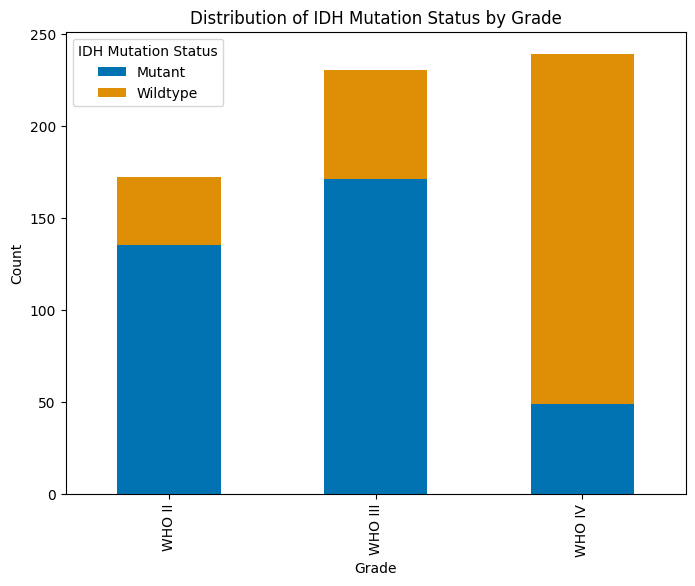

In [ ]:
# ids_with_both = (
#     clinical693.groupby("CGGA_ID")["IDH_mutation_status"]
#       .nunique()
#       .loc[lambda x: x == 2]
#       .index
# )

# filtered_df = clinical693[clinical693["CGGA_ID"].isin(ids_with_both)]

# print(filtered_df)

import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("colorblind")

counts = clinical693.groupby(["Grade", "IDH_mutation_status"]).size().unstack(fill_value=0)
counts.plot(kind="bar", stacked=True, color=palette, figsize=(8,6))

plt.title("Distribution of IDH Mutation Status by Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.legend(title="IDH Mutation Status")
plt.show()


{'Wildtype', 'Mutant'}
IDH_mutation_status
Mutant      175
Wildtype    149
Name: count, dtype: int64


TypeError: 'value' must be an instance of str or bytes, not a float

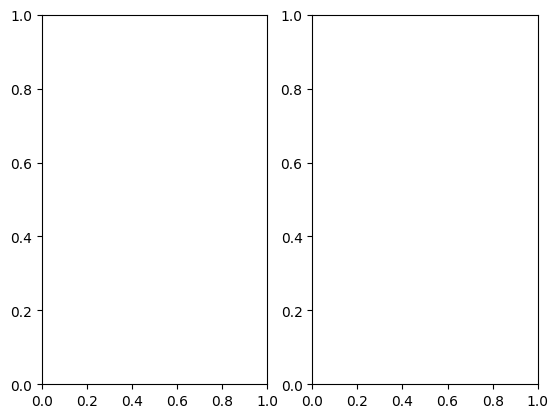

In [ ]:


prs_type693 = clinical693['IDH_mutation_status']
prs_type325 = clinical325['IDH_mutation_status'].dropna()

print(set(prs_type325))
print(prs_type325.value_counts())

fig, (ax1, ax2) = plt.subplots(1, 2)

bars1 = ax1.bar(list(set(prs_type693)), prs_type693.value_counts())
bars2 = ax2.bar(list(set(prs_type325)), prs_type325.value_counts())

ax1.bar_label(bars1, label_type='edge', color='darkblue')
ax1.set_title('mRNAseq_693')
ax2.bar_label(bars2, label_type='edge', color='darkblue')
ax2.set_title('mRNAseq_325')
# plt.bar(list(set(prs_type)), prs_type.value_counts(), color='lightblue')

# plt.xlabel('Categories')
# plt.ylabel('Values')

plt.show()